In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
print(os.getcwd())

/Users/issackhant/Desktop/data-science-project/K-Means-Clustering


In [33]:
# Function to load and preprocess the X-ray image
def load_image(image_path):
    abs_path = os.path.abspath(image_path)
    print(f"Attempting to load image from: {abs_path}")
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found or invalid path: {abs_path}")
    return img

In [34]:
# Function to preprocess the image
def preprocess_image(image):
    # Step 1: Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Step 2: Apply histogram equalization to enhance contrast
    equalized = cv2.equalizeHist(blurred)
    
    return equalized

In [35]:
# Function to apply K-Means clustering for image enhancement
def enhance_image_kmeans(image, n_clusters=8):
    # Reshape image to a 1D array of pixels
    pixel_values = image.reshape(-1, 1)
    
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pixel_values)
    
    # Get cluster labels and centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    # Create segmented image by mapping pixels to cluster centers
    segmented_pixels = centers[labels].reshape(image.shape)
    segmented_image = cv2.normalize(segmented_pixels, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    return segmented_image, labels

In [36]:
# Function to blend original and clustered image for better detail preservation
def blend_images(original, clustered, alpha=0.7):
    # Ensure both images are in the same format
    original = original.astype(np.float32)
    clustered = clustered.astype(np.float32)
    
    # Blend: alpha * clustered + (1 - alpha) * original
    blended = alpha * clustered + (1 - alpha) * original
    blended = cv2.normalize(blended, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    return blended

In [37]:
# Function to apply edge enhancement
def enhance_edges(image):
    # Apply a slight sharpening filter to highlight edges
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened

In [38]:
# Main function to process and display results
def process_xray_image(image_path, n_clusters=8):
    # Load image
    original_img = load_image(image_path)
    
    # Preprocess image
    preprocessed_img = preprocess_image(original_img)
    
    # Enhance image using K-Means
    clustered_img, labels = enhance_image_kmeans(preprocessed_img, n_clusters)
    
    # Blend the clustered image with the preprocessed image
    blended_img = blend_images(preprocessed_img, clustered_img, alpha=0.7)
    
    # Apply edge enhancement
    final_img = enhance_edges(blended_img)
    
    # Display results
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    plt.title("Original X-ray Image")
    plt.imshow(original_img, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title("Preprocessed (Contrast Enhanced)")
    plt.imshow(preprocessed_img, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title(f"Enhanced X-ray Image (K-Means, {n_clusters} Clusters)")
    plt.imshow(final_img, cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('xray_comparison_improved.png')
    plt.show()
    
    return final_img



Attempting to load image from: /Users/issackhant/Desktop/data-science-project/x-ray-images/xray_image1.png


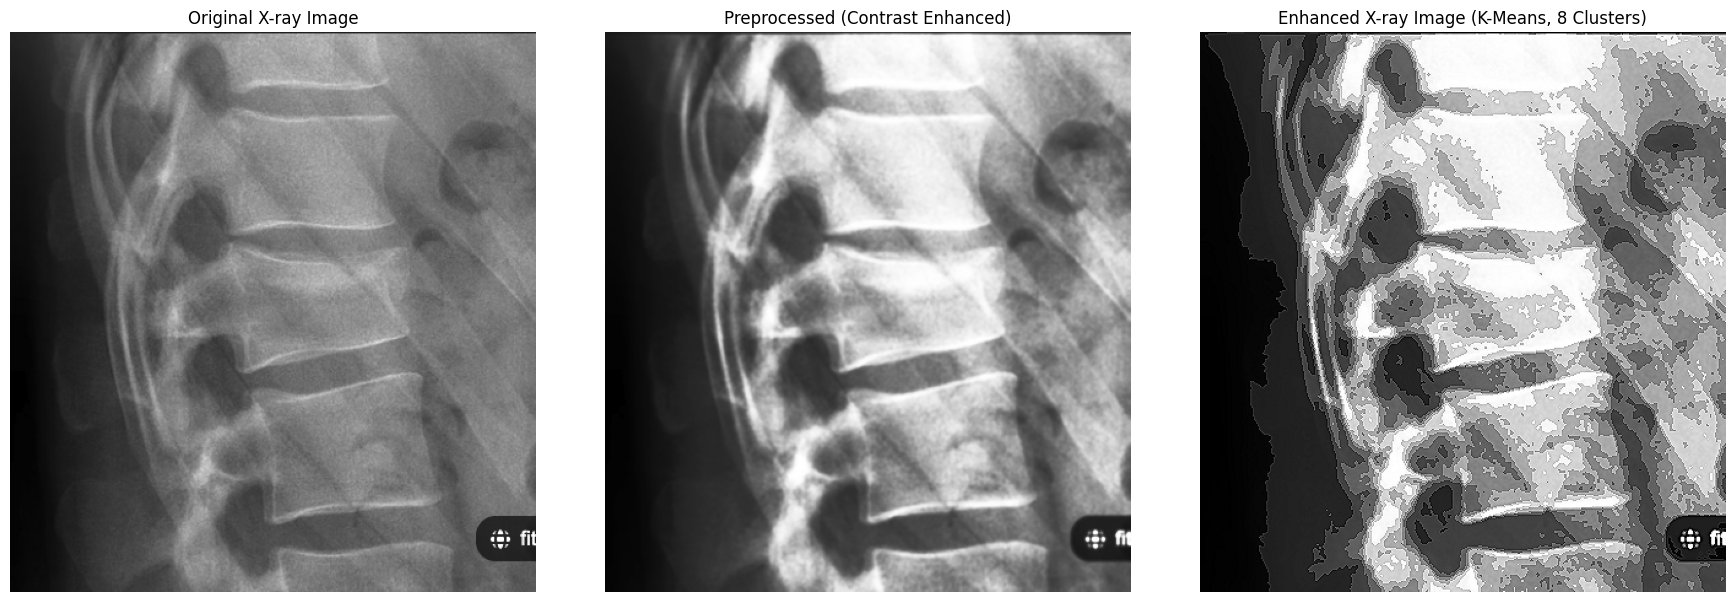

In [39]:
if __name__ == "__main__":
    image_path = '/Users/issackhant/Desktop/data-science-project/x-ray-images/xray_image1.png'
    n_clusters = 8  # Increased number of clusters
    enhanced_image = process_xray_image(image_path, n_clusters)